In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
def printMetrics(test, pred): 
    cm = confusion_matrix(test,pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
    cm_display.plot()
    print(f"accuracy: {accuracy_score(test, pred)}")
    print(f"f1_score: {f1_score(test, pred)}")
    print(f"precision_score: {precision_score(test, pred)}")
    print(f"recall: {recall_score(test, pred)}")

In [4]:
df = pd.read_csv("datasource/bank_data_after_fe.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'datasource/bank_data_after_fe.csv'

In [ ]:
df.describe()

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown
count,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3.616000e+03,3616.000000,3616.000000,...,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000
mean,3.135373,0.674226,0.590017,0.019082,8.365862,0.568308,0.154591,9.824983e-17,2.795354,40.218473,...,0.046737,0.040376,0.088772,0.017976,0.175608,0.028208,0.007743,0.646018,0.063606,0.290376
std,1.000138,0.435854,0.293404,0.136832,0.399632,0.495381,0.361564,1.000138e+00,3.144846,100.170192,...,0.211104,0.196867,0.284454,0.132881,0.380539,0.165589,0.087667,0.478270,0.244084,0.453999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.104636e+00,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.397530,0.000000,0.500000,0.000000,8.125335,0.000000,0.000000,-6.202218e-01,1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.078535,1.000000,0.500000,0.000000,8.233370,1.000000,0.000000,-2.187516e-02,2.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,3.897703,1.000000,1.000000,0.000000,8.474651,1.000000,0.000000,6.323800e-01,3.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,6.085723,1.000000,1.000000,1.000000,10.722364,1.000000,1.000000,3.704733e+00,50.000000,871.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
target_value = "y"

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=target_value),
    df[target_value],
    test_size=0.2,
    stratify=df[target_value],
    random_state=42,
)

In [ ]:
from sklearn.utils import compute_class_weight


weights = compute_class_weight(class_weight="balanced",classes= np.unique(y_train), y = y_train)
weights = {0:weights[0], 1:weights[1]}

In [1]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


estimators = [("LogisticRegression", LogisticRegression(max_iter=1000,solver="liblinear", penalty="l1", class_weight=weights)),
              ("DecisionTree", DecisionTreeClassifier(max_depth=6, min_samples_leaf=20, class_weight=weights)),
              ("Gradient", GradientBoostingClassifier(random_state=42, learning_rate=0.13, min_samples_split=6)),
              ("RandomForestClassifier",  RandomForestClassifier(random_state= 42,n_estimators = 1000, n_jobs = -1)),
              ("XGBClassifier", XGBClassifier(random_state=42, n_estimators=1000, learning_rate=0.3, booster="gbtree", max_depth=5)),
              ("SVC", SVC(class_weight=weights, kernel="linear", decision_function_shape="ovr"))]

NameError: name 'weights' is not defined

# We are gonna use this one as foundings for final algorithm

accuracy: 0.9033149171270718
f1_score: 0.6111111111111112
precision_score: 0.5670103092783505
recall: 0.6626506024096386


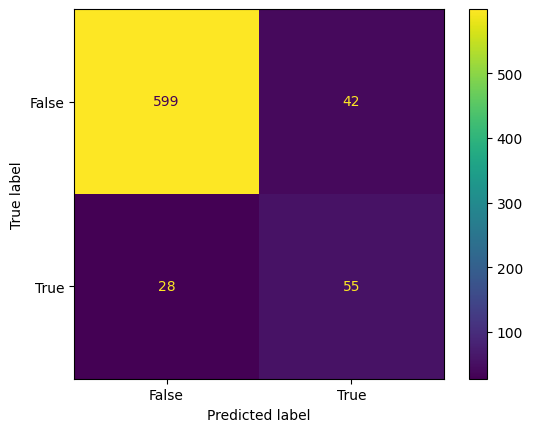

In [80]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators[:-1], final_estimator=LogisticRegression(solver="liblinear", penalty="l1", class_weight={0:1, 1:2.6}))#1,2
clf.fit(X_train, y_train).score(X_test, y_test)
y_hat = clf.predict(X_test)
printMetrics(y_test, y_hat)

accuracy: 0.9033149171270718
f1_score: 0.6022727272727273
precision_score: 0.5698924731182796
recall: 0.6385542168674698


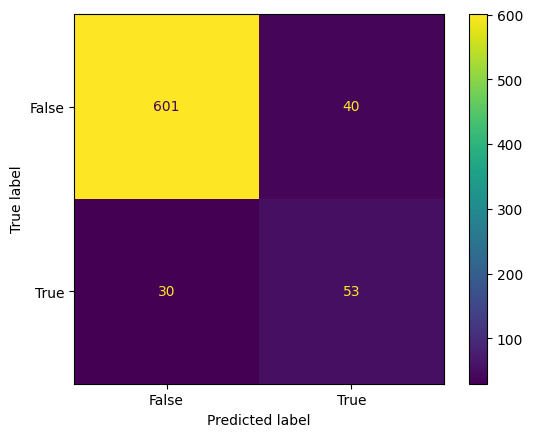

In [59]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(solver="liblinear", penalty="l1", class_weight={0:1, 1:2.6}), passthrough= True)#1,2
clf.fit(X_train, y_train).score(X_test, y_test)
y_hat = clf.predict(X_test)
printMetrics(y_test, y_hat)

accuracy: 0.9033149171270718
f1_score: 0.5930232558139535
precision_score: 0.5730337078651685
recall: 0.6144578313253012


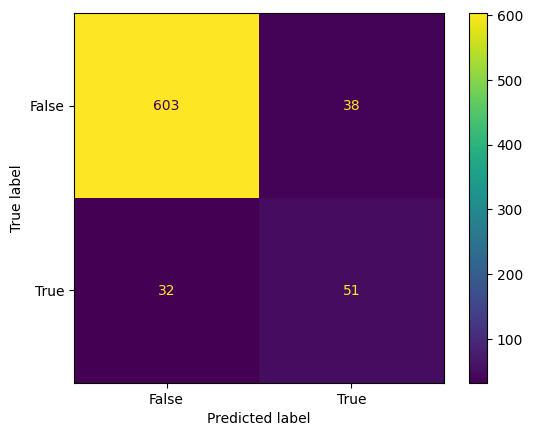

In [76]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators[:-1],
                          final_estimator=LogisticRegression(solver="liblinear", penalty="l1", class_weight={0:1, 1:2.6}), 
                          passthrough= False,
                          cv = 10)#1,2
clf.fit(X_train, y_train).score(X_test, y_test)
y_hat = clf.predict(X_test)
printMetrics(y_test, y_hat)

accuracy: 0.6795580110497238
f1_score: 0.32558139534883723
precision_score: 0.21455938697318008
recall: 0.6746987951807228


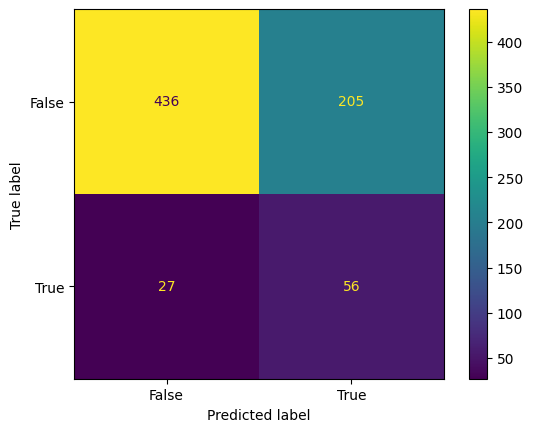

In [51]:
model = SVC(class_weight=weights, kernel="linear", decision_function_shape="ovr")
model.fit(X_train,y_train)
y_hat = model.predict(X_test)
printMetrics(y_test,y_hat)

accuracy: 0.8066298342541437
f1_score: 0.5035460992907801
precision_score: 0.35678391959798994
recall: 0.8554216867469879


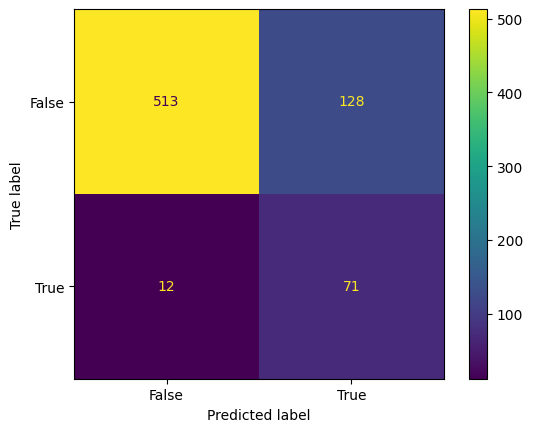

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

pipe = Pipeline([("scaler", MinMaxScaler()), ("estimator", SVC(class_weight=weights, kernel="linear", decision_function_shape="ovr"))])
pipe.fit(X_train,y_train)
y_hat = pipe.predict(X_test)
printMetrics(y_test,y_hat)

accuracy: 0.7997237569060773
f1_score: 0.4982698961937716
precision_score: 0.34951456310679613
recall: 0.8674698795180723


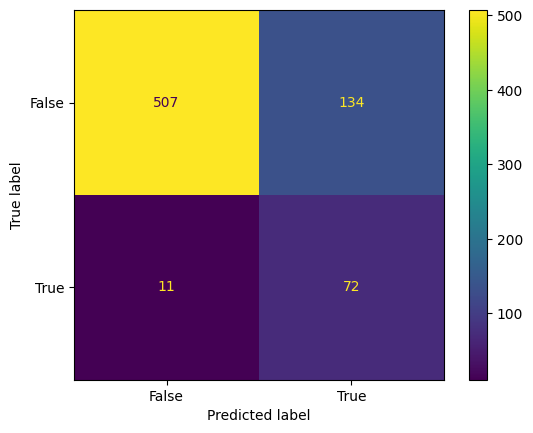

In [20]:
from sklearn.preprocessing import RobustScaler

pipe = Pipeline([("scaler", RobustScaler()), ("estimator", SVC(class_weight=weights, kernel="linear", decision_function_shape="ovr"))])
pipe.fit(X_train,y_train)
y_hat = pipe.predict(X_test)
printMetrics(y_test,y_hat)

accuracy: 0.830110497237569
f1_score: 0.4810126582278481
precision_score: 0.37012987012987014
recall: 0.6867469879518072


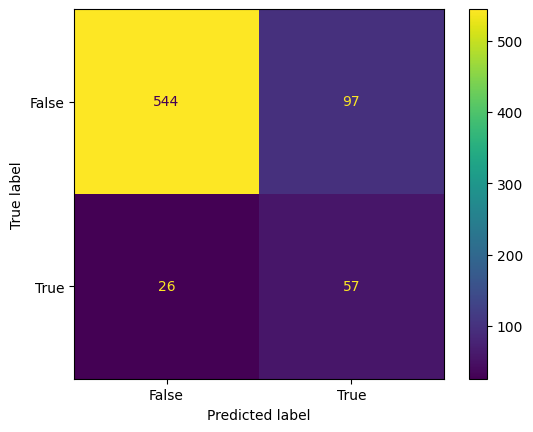

In [37]:
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([("scaler", StandardScaler()), ("estimator", SVC(class_weight=weights, kernel="poly", degree=3, decision_function_shape="ovr",  break_ties = False))])
pipe.fit(X_train,y_train)
y_hat = pipe.predict(X_test)
printMetrics(y_test,y_hat)

accuracy: 0.8093922651933702
f1_score: 0.5106382978723404
precision_score: 0.36180904522613067
recall: 0.8674698795180723


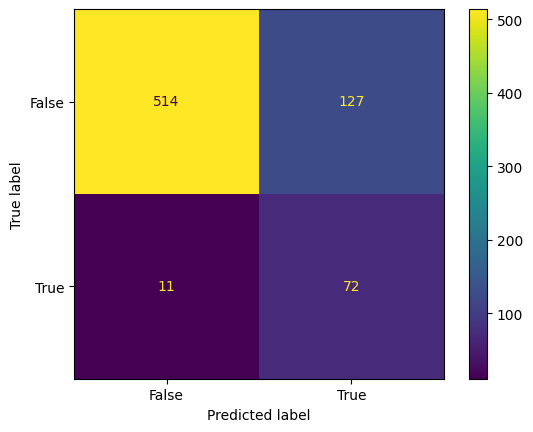

In [38]:
from sklearn.preprocessing import MaxAbsScaler

pipe = Pipeline([("scaler", MaxAbsScaler()), ("estimator", SVC(class_weight=weights, kernel="linear", decision_function_shape="ovr"))])
pipe.fit(X_train,y_train)
y_hat = pipe.predict(X_test)
printMetrics(y_test,y_hat)

accuracy: 0.8287292817679558
f1_score: 0.38
precision_score: 0.3247863247863248
recall: 0.4578313253012048


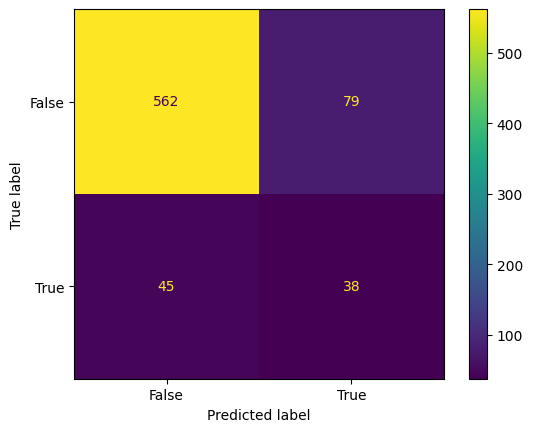

In [45]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB(priors=[0.89,0.11])
model.fit(X_train,y_train)
y_hat = model.predict(X_test)
printMetrics(y_test,y_hat)